# Question 7.1

#### I have an online clothing store and would like to predict the sales of winter clothes like sweaters, hoodies, and jackets based on historical data. I would collect historical sales data for winter clothes over several years, and month by month. I want to know which months have the biggest sales to prepare and stock enough products. 
#### Data I would need is time period (month, week, and day), and sales volume for each time period.
#### I can guess that the high sales volume could be in the last days of summer and before holidays like Thanksgiving, Christmas, and New Year. 
#### I expect the value of alpha to be closer to 1 because the winter season is a short-term trend and not stable. We also need to focus on unstable factor like weather and holidays.

# Question 7.2

In [1]:
rm(list = ls())

In [2]:
data <- read.table('./data 7.2/temps.txt', stringsAsFactors = FALSE, header = TRUE)
head(data)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,...,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,...,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,...,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,...,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,...,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,...,81,87,82,87,89,90,98,83,87,84


In [3]:
print(tail(data))

       DAY X1996 X1997 X1998 X1999 X2000 X2001 X2002 X2003 X2004 X2005 X2006
118 26-Oct    75    71    79    69    75    64    68    68    79    61    62
119 27-Oct    75    57    79    75    78    51    69    64    81    63    66
120 28-Oct    81    55    79    73    80    55    75    57    78    62    63
121 29-Oct    82    64    78    72    75    63    75    70    75    64    72
122 30-Oct    82    66    82    75    77    72    68    77    78    69    73
123 31-Oct    81    60    79    75    78    71    60    75    82    70    68
    X2007 X2008 X2009 X2010 X2011 X2012 X2013 X2014 X2015
118    68    70    65    85    77    80    61    84    67
119    67    59    60    76    79    70    69    84    56
120    70    50    71    74    74    56    64    77    78
121    62    59    75    68    59    56    75    73    70
122    67    65    66    71    61    56    78    68    70
123    71    67    69    75    65    65    74    63    62


In [4]:
# Converting data frame to time series
ts_data<-ts(as.vector(unlist(data[,2:21])), start=1996, frequency=123)

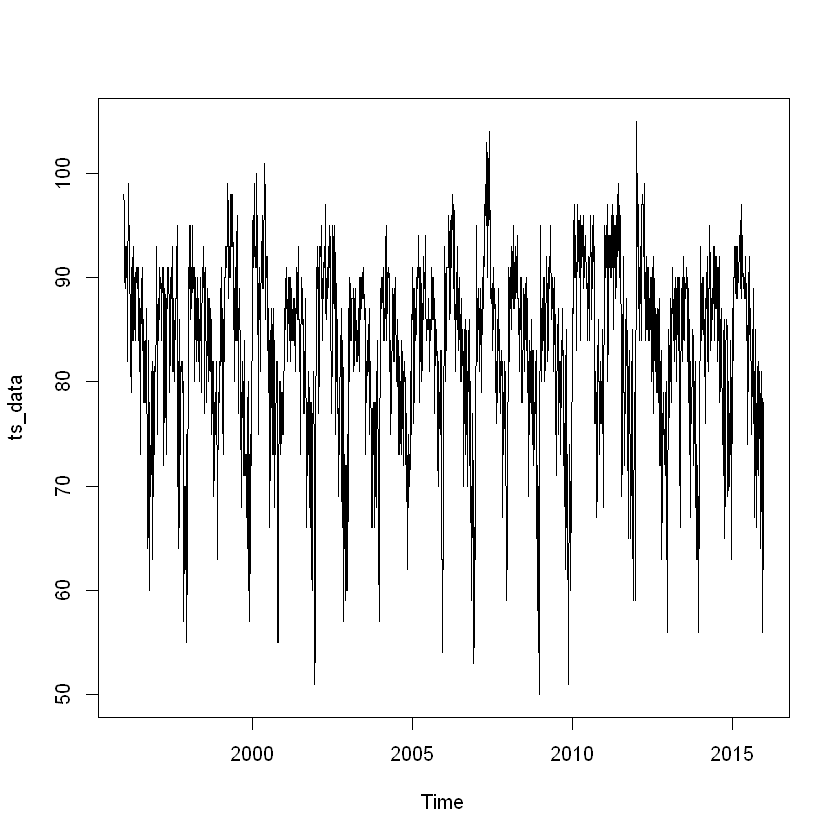

In [5]:
plot.ts(ts_data)

In [6]:
# Set alpha, beta, and gamma to null to let HoltWinters function to find optimal values 
# There are seasonal variations, so set seasonal to "multiplicative" 
holtWinters_res<-HoltWinters(ts_data, alpha=NULL, beta=NULL, gamma=NULL, seasonal ="multiplicative") 
summary(holtWinters_res)

             Length Class  Mode     
fitted       9348   mts    numeric  
x            2460   ts     numeric  
alpha           1   -none- numeric  
beta            1   -none- numeric  
gamma           1   -none- numeric  
coefficients  125   -none- numeric  
seasonal        1   -none- character
SSE             1   -none- numeric  
call            6   -none- call     

In [7]:
head(holtWinters_res$fitted)

xhat,level,trend,season
87.23653,82.87739,-0.004362918,1.052653
90.42182,82.15059,-0.004362918,1.100742
92.99734,81.91055,-0.004362918,1.135413
90.94030,81.90763,-0.004362918,1.110338
83.99917,81.93634,-0.004362918,1.025231
84.04496,81.93247,-0.004362918,1.025838


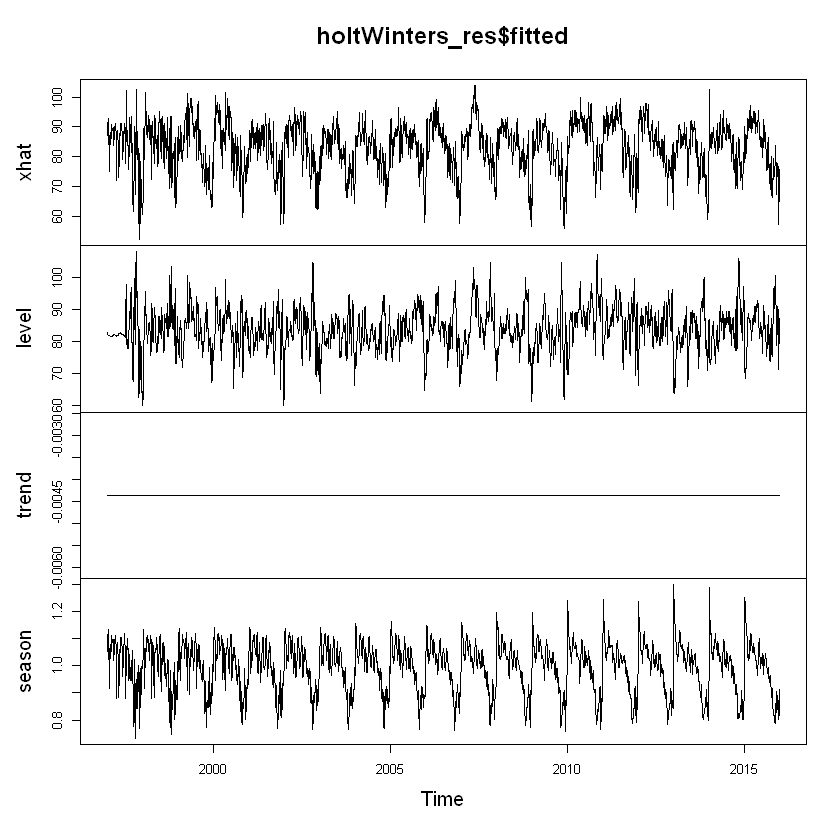

In [8]:
plot(holtWinters_res$fitted)

#### The plot above shows the trend is close to 0

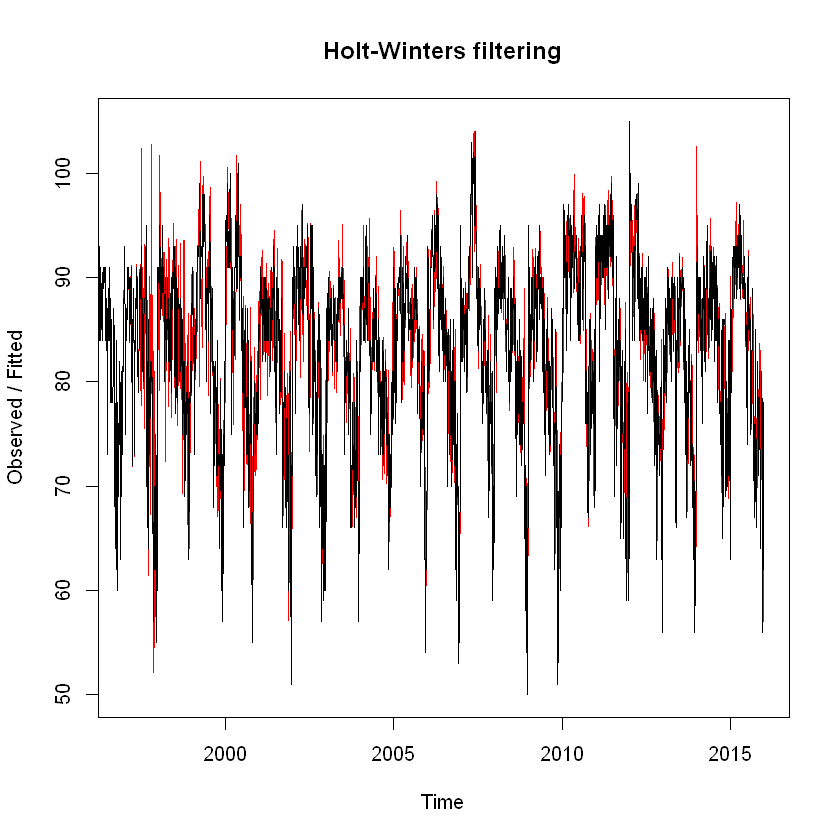

In [9]:
plot(holtWinters_res) 
# Plot actual data and smoothed data

#### Actual data and smoothed data fit well

In [10]:
temps_hw_sf <- matrix(holtWinters_res$fitted[,4], nrow=123)
head(temps_hw_sf)

1.052653,1.049468,1.120607,1.103336,1.118390,1.108172,1.140906,1.140574,1.125438,1.122063,1.161415,1.198102,1.198910,1.243012,1.243781,1.238435,1.300204,1.290647,1.254521
1.100742,1.099653,1.108025,1.098323,1.110184,1.116213,1.126827,1.154074,1.142187,1.131889,1.144549,1.134661,1.153433,1.165431,1.172935,1.190735,1.191956,1.219190,1.228826
1.135413,1.135420,1.139096,1.142831,1.143201,1.138495,1.129678,1.156092,1.165657,1.147982,1.149459,1.135756,1.153310,1.155197,1.157286,1.169773,1.189915,1.172309,1.169045
1.110338,1.110492,1.117079,1.125774,1.134539,1.126117,1.130758,1.137722,1.150639,1.146992,1.142497,1.150162,1.151169,1.157751,1.163844,1.159343,1.166605,1.167993,1.158956
1.025231,1.025233,1.044684,1.067291,1.084725,1.097239,1.115055,1.103877,1.120818,1.133733,1.132167,1.142714,1.139244,1.112909,1.132435,1.132045,1.145230,1.168161,1.170449
1.025838,1.025722,1.028169,1.042340,1.053954,1.067494,1.080203,1.094312,1.102680,1.092178,1.075766,1.088547,1.082185,1.103092,1.115071,1.118575,1.121598,1.134962,1.145475


In [11]:
tail(temps_hw_sf)

"[118,]",0.9202878,0.9167266,0.9316249,0.9483276,0.9356822,0.8960745,0.9115292,0.8880224,0.8919086,0.9016390,0.9096762,0.9076538,0.9056794,0.8805521,0.8824280,0.8730733,0.8639161,0.8614441,0.8717307
"[119,]",0.9203791,0.8752448,0.8890989,0.9189986,0.9279178,0.8676299,0.8817807,0.8675880,0.8778461,0.8903499,0.9073530,0.9042270,0.8709238,0.8536790,0.8396531,0.8495173,0.8266791,0.8544568,0.8598048
"[120,]",0.9934182,0.9493421,0.9386713,0.9343247,0.9395149,0.9269720,0.9360466,0.8945719,0.8856237,0.8857793,0.8844382,0.8961658,0.8523899,0.8794887,0.8631928,0.8499712,0.7994624,0.8024431,0.8002607
"[121,]",1.0052839,1.0170234,0.9947869,0.9777463,0.9568681,0.9754782,0.9685817,0.9862772,0.9533857,0.9449564,0.9580790,0.9214616,0.9301216,0.9347985,0.8985886,0.8409815,0.8223158,0.8457842,0.8257107
"[122,]",1.0049851,1.0160082,1.0182545,1.0152111,1.0042247,1.0293585,0.9928965,1.0143191,1.0032329,1.0049513,1.0001026,0.9921573,1.0005049,0.9591606,0.9478091,0.9185031,0.8930257,0.8944247,0.8615051
"[123,]",0.9920411,0.9788295,0.9796735,0.9865343,0.9910570,1.0001962,0.9651261,0.9733806,0.9879126,0.9947735,0.9800279,0.9931484,1.0024638,0.9948792,0.9941488,0.9852592,0.9909004,0.9581546,0.9137532


In [12]:
temps_hw_smoothed <- matrix(holtWinters_res$fitted[,1], nrow=123)
head(temps_hw_smoothed)

87.23653,65.04516,90.29613,83.39938,87.68863,78.07509,73.10059,87.27074,92.29714,78.50826,81.58696,84.72917,79.51855,86.74604,93.88371,82.30605,84.88750,102.54643,90.07756
90.42182,84.87634,85.44878,86.44444,84.78855,86.02384,72.13247,85.01878,92.85614,88.18138,88.52648,80.39548,85.65722,81.47324,87.43846,92.55001,76.18707,89.57468,85.16854
92.99734,89.61560,85.65942,92.85774,88.70570,90.23022,77.77739,82.68648,92.33884,92.43570,86.72311,84.53380,88.31357,82.29310,90.24836,91.18746,81.46207,88.15080,82.09161
90.94030,88.47600,84.80741,91.55309,86.98750,87.27931,83.52416,83.37312,87.29596,92.69774,83.30574,89.62822,88.56597,82.90566,93.69353,95.13130,76.56780,87.11605,79.49314
83.99917,83.11178,81.14293,88.80208,81.40681,86.06745,83.86090,83.64904,84.25223,90.58916,84.18954,89.27001,89.12501,80.92784,90.14667,94.60910,75.42085,85.20682,83.69666
84.04496,88.00054,85.21673,91.04477,81.83758,87.87757,78.93483,86.79140,85.75665,86.91496,82.21750,84.28967,79.32562,84.52016,88.67069,96.75445,78.42462,83.25423,82.08838


In [13]:
#Let's add the row and column names back into the dataset for ease of use.
colnames(temps_hw_sf) <- colnames(data[,3:21])
rownames(temps_hw_sf) <- data[,1]

colnames(temps_hw_smoothed) <- colnames(data[,3:21])
rownames(temps_hw_smoothed) <- data[,1]

# One interesting thing we could look at is the average seasonal factor for each year and for the dataset as a whole.
meanSFAllYears <- mean(temps_hw_sf)
meanSFAllYears

[1] 0.9954727

In [14]:
meanSFEachYear <- vector()
for (i in 1:ncol(temps_hw_sf)){
  meanSFEachYear[i] = mean(temps_hw_sf[,i])
}
meanSFEachYear

[1] 1.0000000 0.9981882 0.9980547 0.9975095 0.9971271 0.9961954 0.9955108
 [8] 0.9957393 0.9956360 0.9949667 0.9948162 0.9946495 0.9943300 0.9941211
[15] 0.9940949 0.9933907 0.9932476 0.9935215 0.9928824

In [15]:
# Let pick Oct 1st is the first day of Fall
which(data$DAY=="1-Oct")

[1] 93

In [16]:
mean(temps_hw_sf[93:123,])

[1] 0.8751098

In [17]:
meanSF_firstYear <- mean(temps_hw_sf[,1])
meanSF_firstYear

[1] 1

In [18]:
# Using cusum to define last day of summer each year. 
cusum_decrease = function(data, mean, T, C){
  results = list()
  cusum = 0
  rowCounter = 1
  while (rowCounter <= nrow(data)){
    current = data[rowCounter,]
    cusum = max(0, cusum + (mean - current - C))
    if (cusum >= T) {
      results = rowCounter
      break
    }
    rowCounter = rowCounter + 1
    if (rowCounter >= nrow(data)){
      results = NA
      break
    }
  }
  return(results)
}

C_var = sd(temps_hw_sf[,1])*0.5
T_var = sd(temps_hw_sf[,1])*3

result_vector = vector()
for (col in 1:ncol(temps_hw_sf)){
  result_vector[col] = cusum_decrease(data = as.matrix(temps_hw_sf[,col]), mean = 1,T = T_var, C = C_var)
}

result_df = data.frame(Year = colnames(temps_hw_sf),Day = data[result_vector,1])
result_df

Year,Day
X1997,30-Sep
X1998,1-Oct
X1999,1-Oct
X2000,1-Oct
X2001,2-Oct
X2002,2-Oct
X2003,3-Oct
X2004,3-Oct
X2005,4-Oct
X2006,4-Oct


#### From this output, it looks like summer temperatures lasted longer into the year as time went on.